# Analysis of Chu San Zang Ji Ji

In [31]:
!pip install pandas matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('data/chusanzangjiji.csv')

In [34]:
filtered_df = df[(df['CSZJJ Fascicle'] == 3) | (df['CSZJJ Fascicle'] == 4)]

In [35]:
print(f'Total number of anonymous records (fascicle 3 or 4): {len(filtered_df)}')

Total number of anonymous records (fascicle 3 or 4): 1622


In [36]:
df3 = df[df['CSZJJ Fascicle'] == 3]
section_counts_df3 = df3['CSZJJ Section No.'].value_counts()
print(f'Number of records in fascicle 3 sections:')
print(section_counts_df3)
df4 = df[df['CSZJJ Fascicle'] == 4]
print(f'Number of records in fascicle 4: {len(df4)}')


Number of records in fascicle 3 sections:
CSZJJ Section No.
2    142
1     92
3     59
4     24
7      5
Name: count, dtype: int64
Number of records in fascicle 4: 1300


In [37]:
lost_df = filtered_df[filtered_df['CSZJJ mentions lost or not seen'].notnull()]
print(f'Number of anonymous records lost or not seen: {len(lost_df)}')

Number of anonymous records lost or not seen: 663


In [38]:
modern_canon_df = filtered_df[filtered_df['Modern Collection Ref'].notnull()]
print(f'Number of anonymous records related to a modern collection: {len(modern_canon_df)}')

Number of anonymous records related to a modern collection: 365


In [39]:
t154_series = modern_canon_df['Modern Collection Ref'].str.contains('T 154')
print(f'Number of anonymous records related to T 154: {t154_series.sum()}')
t154_df = modern_canon_df[t154_series]['Modern Collection Ref'].sort_values()
print(f'List of anonymous records related to T 154:')
t154_df[:40]

Number of anonymous records related to T 154: 34
List of anonymous records related to T 154:


1260     T 154 (1)
1300    T 154 (10)
1198    T 154 (11)
1268    T 154 (12)
1358    T 154 (13)
947     T 154 (14)
994     T 154 (16)
956     T 154 (17)
851     T 154 (19)
993      T 154 (2)
2091    T 154 (20)
1289    T 154 (25)
995     T 154 (26)
1189    T 154 (27)
1377    T 154 (28)
1273    T 154 (30)
1275    T 154 (31)
1132    T 154 (33)
1567    T 154 (35)
1571    T 154 (37)
1126    T 154 (38)
1252    T 154 (39)
1202    T 154 (40)
1024    T 154 (43)
1276    T 154 (47)
1406     T 154 (5)
1295    T 154 (50)
1278    T 154 (51)
1197    T 154 (52)
1035    T 154 (53)
1279     T 154 (6)
1225     T 154 (7)
1026     T 154 (9)
1904     T 154(36)
Name: Modern Collection Ref, dtype: object

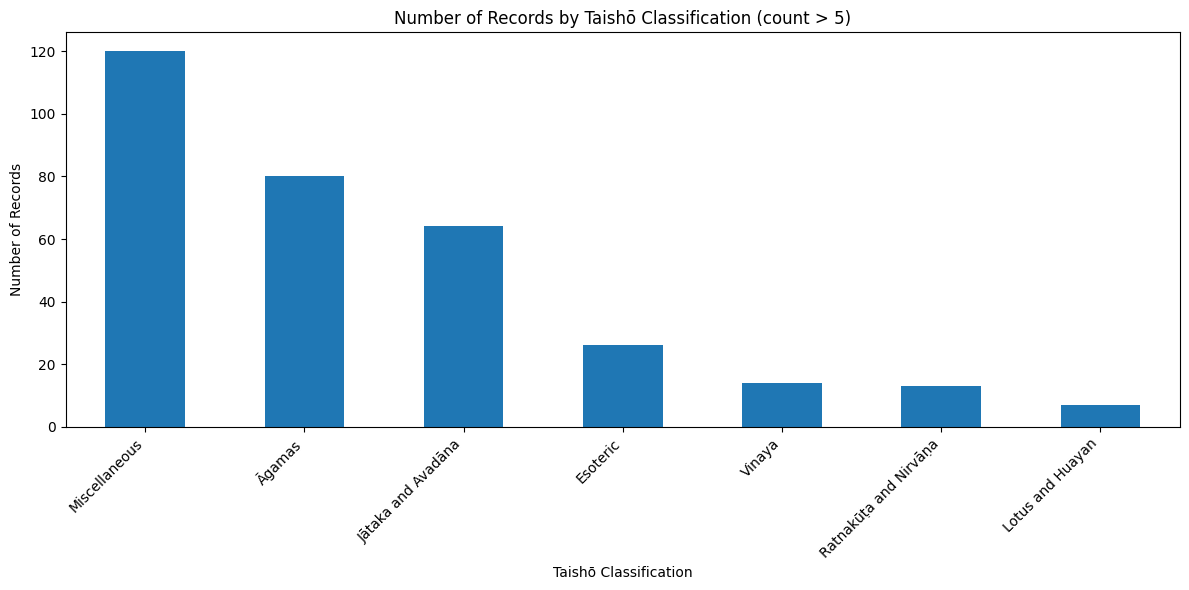

In [41]:
counts = filtered_df['Taishō classification'].value_counts()
filtered_counts = counts[counts > 5]
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title('Number of Records by Taishō Classification (count > 5)')
plt.xlabel('Taishō Classification')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()